## Generate several points randomly

In [1]:
import random
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


all_data_points=[]
all_labeled_points=[]
### parameters setting
num_first_select = 5 ###number of first select points
num_itera = 1 ###number of second and subsequence
max_iteras = 100 ###number of max iteration steps

C_v = 100.0
gamma_v = 100.0

trainning_times = 0
trainning_num = num_first_select

with open("failure_labeled.xyz", "r") as file:
    for line in file:
        data = line.strip().split()
        first_number = float(data[0])
        second_number = int(data[1])
        fourth_number = int(data[3])
        stress_lab = float(data[2])
        point_x = int(first_number*1000)
        point_y = int(data[1])

        if fourth_number == 1 and first_number >= 1 and second_number % 50 == 0:
            point_s=(point_x,1000+point_y/30)
            point_s_labeled=(point_x,1000+point_y/30,stress_lab)
            all_data_points.append(point_s)
            all_labeled_points.append(point_s_labeled)

data_lab = np.array(all_labeled_points)
input_data_lab = data_lab[:, :2]/1000  # First two columns are input
output_data_lab = data_lab[:, 2]  # Third column is output

train_data_lab, test_data_lab, train_labels_lab, test_labels_lab = train_test_split(input_data_lab, output_data_lab, test_size=0.023, random_state=1110)            
            
            
            
            
x_sum = 0
y_sum = 0
for point in all_data_points:
    x_sum += point[0]
    y_sum += point[1]
centroid_x = x_sum / len(all_data_points)
centroid_y = y_sum / len(all_data_points)
centroid_point = (centroid_x, centroid_y)


def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)


inf=float('inf')
for point in all_data_points:
    dis_two = euclidean_distance(point, centroid_point)
    if dis_two < inf:
        inf = dis_two
        mid_point = point
        
print(centroid_point)
print(mid_point)
print(type(all_data_points))
print(len(test_data_lab))

(1022.3796296296297, 1043.061985596704)
(1022, 1043.3333333333333)
<class 'list'>
30


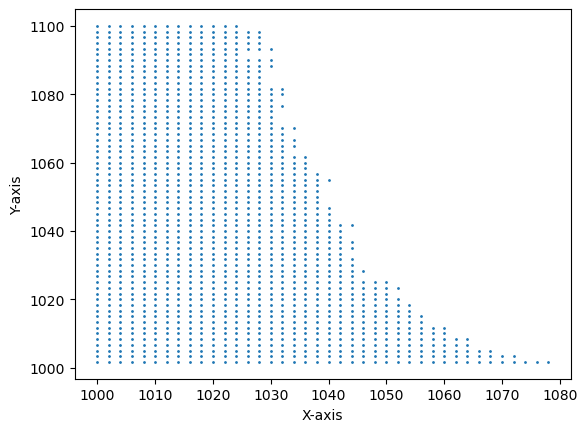

In [2]:
import matplotlib.pyplot as plt
x_values, y_values = zip(*all_data_points)
plt.scatter(x_values, y_values, s=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [3]:
first_iter=[]
first_iter.append(mid_point)
all_data_points_set = set(all_data_points)  
first_iter_set = set(first_iter)
all_data_points_set.difference_update(first_iter_set)
all_data_points = list(all_data_points_set)
first_iter = list(first_iter_set)

for u in range (0,num_first_select-1):
    max_dis=0
    for i in range (0, len(all_data_points)):
        min_dis=float('inf')
        for j in range (0, len(first_iter)):
            dis_1=euclidean_distance(all_data_points[i], first_iter[j])
            if dis_1 < min_dis:
                min_dis = dis_1
        if min_dis > max_dis:
            max_dis = min_dis
            max_dis_point = all_data_points[i]
    first_iter.append(max_dis_point)
all_data_points_set = set(all_data_points)  
first_iter_set = set(first_iter)
all_data_points_set.difference_update(first_iter_set)
all_data_points = list(all_data_points_set)
first_iter = list(first_iter_set)

print(first_iter)

[(1078, 1001.6666666666666), (1000, 1100.0), (1040, 1008.3333333333334), (1000, 1001.6666666666666), (1022, 1043.3333333333333)]


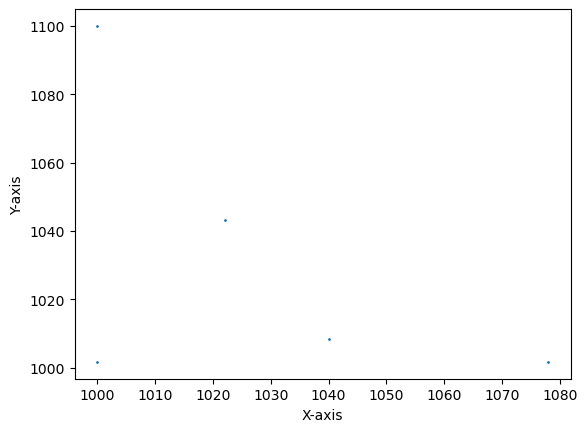

In [4]:
x_values, y_values = zip(*first_iter)
plt.scatter(x_values, y_values, s=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## First Label

In [5]:
with open("failure_labeled.xyz", "r") as file:
    lines = file.readlines()

farilure_lab = {}

for line in lines:
    values = line.split()
    deformation = float(values[0])
    temperature = int(values[1])
    third_value = float(values[2])

    key = (int(deformation*1000), 1000+temperature/30)

    farilure_lab[key] = third_value

associated_data = []

for point in first_iter:
    deformation, temperature = point
    key = (deformation, temperature)
    
    # Check if the key exists in the dictionary
    if key in farilure_lab:
        stress_v = farilure_lab[key]
        associated_data.append((deformation/1000, temperature/1000, stress_v))

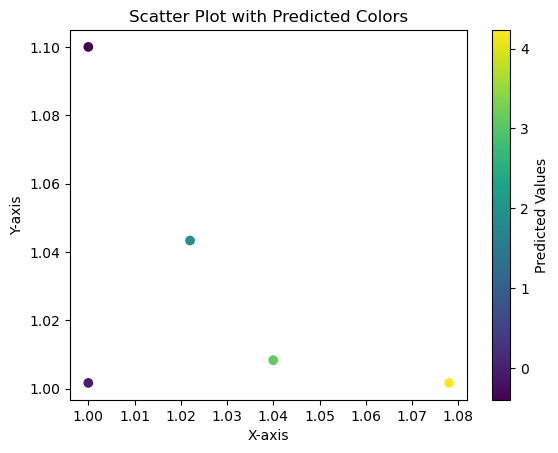

In [6]:
import matplotlib.pyplot as plt
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
z = [point[2] for point in associated_data]
plt.scatter(x, y, c=z, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

## First Trainning

In [7]:

test_mse = []
R2_scores = []
trainning_nums = []
trainning_times = trainning_times+1
trainning_num = trainning_num
trainning_nums.append(trainning_num)

# Extract input and output data from associated_data
data = np.array(associated_data)
input_data = data[:, :2]  # First two columns are input
output_data = data[:, 2]  # Third column is output

train_data, test_data, train_labels, test_labels = train_test_split(input_data, output_data, test_size=0.1, random_state=1000)

model = SVR(kernel='rbf', C=C_v, gamma=gamma_v)
model.fit(train_data, train_labels)

r2_predictions = model.predict(test_data_lab)
R2 = r2_score(test_labels_lab, r2_predictions)
mse_v = mean_squared_error(test_labels_lab, r2_predictions)
R2_scores.append(R2)
test_mse.append(mse_v)

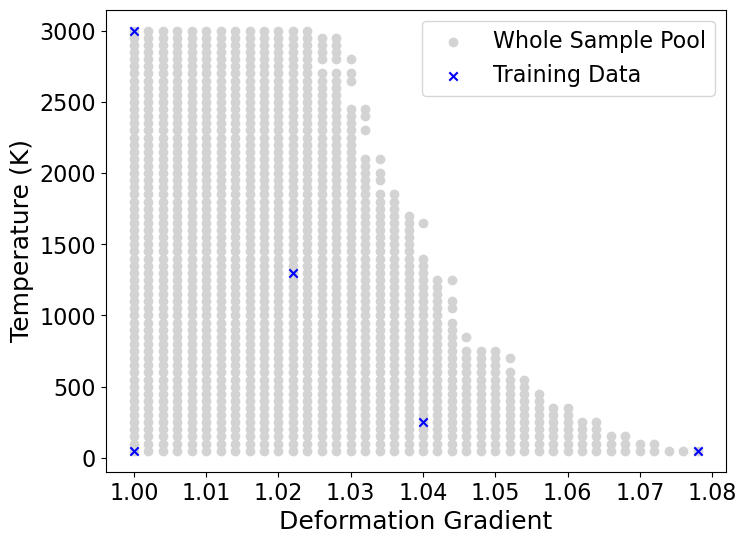

In [8]:
import matplotlib.pyplot as plt
#title_fontsize = 16
label_fontsize = 18
ticks_fontsize = 16
legend_fontsize = 16
fig = plt.figure(figsize=(8, 6))
x_2 = [point[0] for point in input_data_lab]
y_2 = [(point[1] * 1000 - 1000) * 30 for point in input_data_lab]
plt.scatter(x_2, y_2, marker='o', color='lightgray', label='Whole Sample Pool')  
# Assuming associated_data is the whole sample set and train_data_lab is the training data subset
# Extracting x and y coordinates for the whole sample set
x_1 = [point[0] for point in associated_data]
y_1 = [(point[1] * 1000 - 1000) * 30 for point in associated_data]
plt.scatter(x_1, y_1, marker='x', color='blue', label='Training Data')  
# Plotting the whole sample set with a specific marker and color

# Setting labels, title, and legend to distinguish between the datasets
plt.xlabel('Deformation Gradient',fontsize=label_fontsize)
plt.ylabel('Temperature (K)',fontsize=label_fontsize)
#plt.title('Scatter Plot with Predicted Colors')
plt.legend(fontsize=legend_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.savefig('2Deva1.png')
# Show the plot
plt.show()

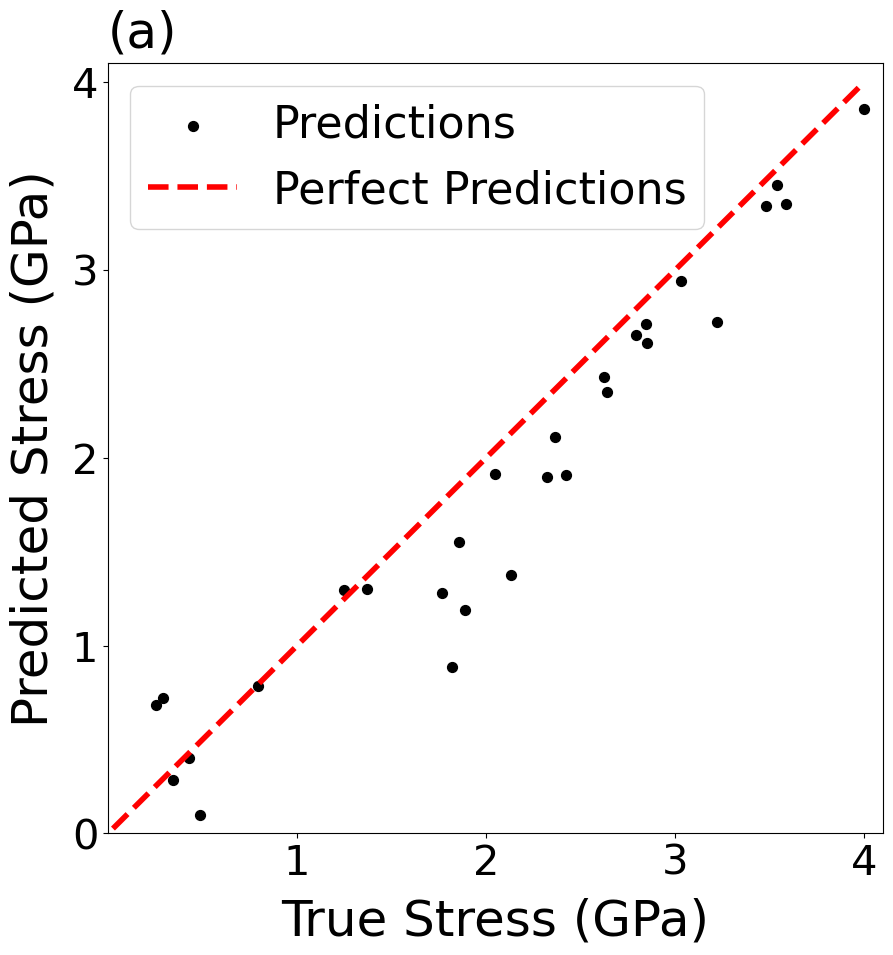

In [9]:
# Creating a 3D plot with connected points for true and predicted values
#title_fontsize = 20
label_fontsize = 36
ticks_fontsize = 30
legend_fontsize = 32
labelpad = 10

x_values = test_data_lab[:, 0]
y_values = (test_data_lab[:, 1] * 1000 - 1000) * 30
z_values = test_labels_lab
# Plotting true values
pre_test_data = model.predict(test_data_lab)
# Plotting predicted values

# Creating a 2D plot comparing true values vs. predicted values
fig, ax = plt.subplots(figsize=(10, 10))

# True values vs. Predicted values
ax.scatter(z_values, pre_test_data, c='black', label='Predictions', s=50)

# Plotting the diagonal line for reference (perfect predictions line)
ax.plot([z_values.min(), z_values.max()], [z_values.min(), z_values.max()], 'r--', lw=4, label='Perfect Predictions')

# Setting labels and title
ax.set_xlabel('True Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
ax.set_ylabel('Predicted Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
# ax.set_title('Comparison of True vs. Predicted Stress Values')

# Setting the ticks font size
ax.tick_params(axis='x', labelsize=ticks_fontsize)
ax.tick_params(axis='y', labelsize=ticks_fontsize)
min_val = 0
max_val = 4.1
ax.set_xlim([min_val, max_val])
ax.set_ylim([min_val, max_val])
ax.set_xticks([ 1, 2, 3, 4])
ax.set_yticks([0, 1, 2, 3, 4])
# Adding a legend
ax.legend(loc='upper left', fontsize=legend_fontsize)

ax.text(-0.00, 1.07, '(a)', transform=ax.transAxes, fontsize=label_fontsize, verticalalignment='top')

plt.savefig('diagonal5.png')
plt.show()

In [10]:
print(type(test_labels_lab))
print(type(r2_predictions))
print(R2_scores)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[0.9030204020178144]


## First Perdiction

In [11]:
# Make predictions
all_data_points=np.array(all_data_points)
scale_all_data_points=all_data_points / 1000
predictions = model.predict(scale_all_data_points)

In [12]:
print(all_data_points)
print(scale_all_data_points)
print(max(predictions))
print(min(predictions))

[[1018.         1035.        ]
 [1052.         1013.33333333]
 [1030.         1045.        ]
 ...
 [1004.         1015.        ]
 [1010.         1095.        ]
 [1014.         1065.        ]]
[[1.018      1.035     ]
 [1.052      1.01333333]
 [1.03       1.045     ]
 ...
 [1.004      1.015     ]
 [1.01       1.095     ]
 [1.014      1.065     ]]
4.0875846266967635
-0.2641680264147832


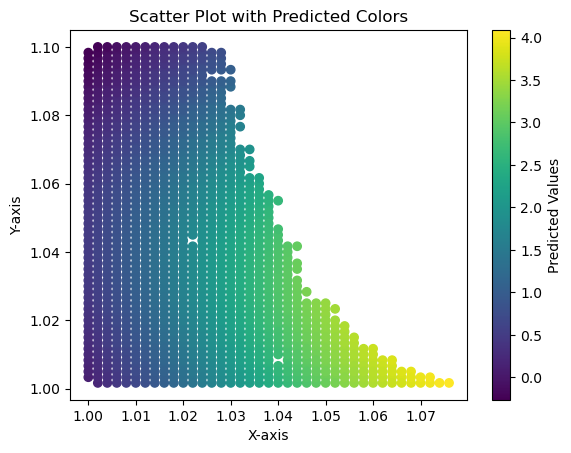

1291


In [13]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()
print(len(all_data_points))

In [14]:
scale_all_data_points = [tuple(row) for row in scale_all_data_points]
all_data_points = [tuple(row) for row in all_data_points]
predictions = np.array(predictions)
n_iter = [t[2] for t in associated_data]
n_iter_input = [(point[0], point[1]) for point in associated_data]
n_iter = np.array(n_iter)
n_iter = n_iter.reshape(-1, 1)
n_iter_select = []
for u in range (0,num_itera):
    max_dis=0
    for i in range (0, len(predictions)):
        min_dis=float('inf')
        for j in range (0, len(n_iter)):
            dis_1=abs(predictions[i]-n_iter[j])
            dis_2=euclidean_distance(scale_all_data_points[i], n_iter_input[j])
            dis_3=dis_1*dis_2
            if dis_3 < min_dis:
                min_dis = dis_3
        if min_dis > max_dis:
            max_dis = min_dis
            max_dis_point = all_data_points[i]
            index_remove = i
    predictions = np.delete(predictions, index_remove)
    n_iter_select.append(max_dis_point)
    all_data_points_set = set(all_data_points)  
    n_iter_select_set = set(n_iter_select)
    all_data_points_set.difference_update(n_iter_select_set)
    all_data_points = list(all_data_points_set)
    n_iter_select = list(n_iter_select_set)
    all_data_points=np.array(all_data_points)
    scale_all_data_points=all_data_points / 1000
    scale_all_data_points = [tuple(row) for row in scale_all_data_points]
    all_data_points = [tuple(row) for row in all_data_points]
print(n_iter_select)

[(1030.0, 1093.3333333333333)]


In [15]:
print(len(all_data_points))
print(len(n_iter_select))
print(n_iter_select)

1290
1
[(1030.0, 1093.3333333333333)]


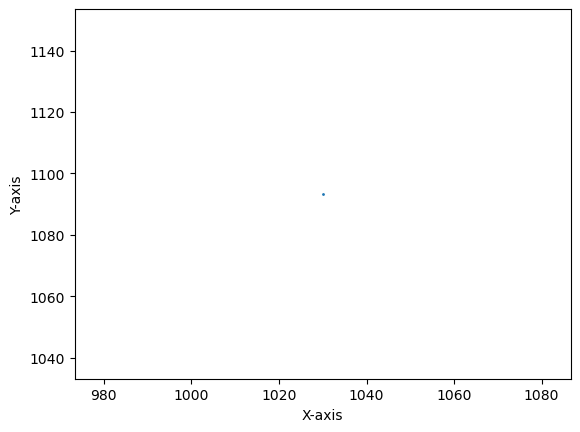

In [16]:
x_values, y_values = zip(*n_iter_select)
plt.scatter(x_values, y_values, s=1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

## second label

In [17]:

for point in n_iter_select:
    deformation, temperature = point
    key = (deformation, temperature)
    
    # Check if the key exists in the dictionary
    if key in farilure_lab:
        stress_v = farilure_lab[key]
        associated_data.append((deformation/1000, temperature/1000, stress_v))

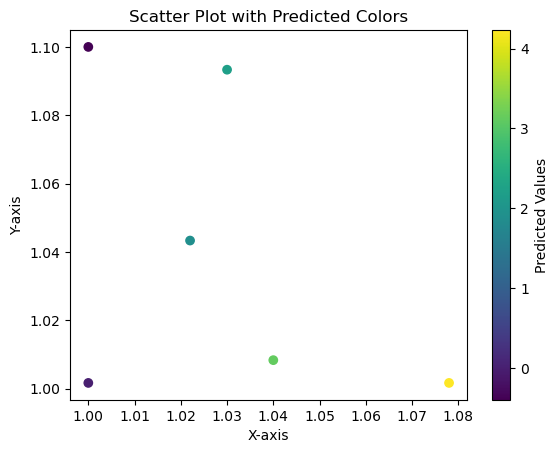

In [18]:
import matplotlib.pyplot as plt
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
z = [point[2] for point in associated_data]
plt.scatter(x, y, c=z, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

## Second training

In [19]:
trainning_times = trainning_times+1
trainning_num = trainning_num + num_itera
trainning_nums.append(trainning_num)

# Extract input and output data from associated_data
data = np.array(associated_data)
input_data = data[:, :2]  # First two columns are input
output_data = data[:, 2]  # Third column is output

train_data = input_data
train_labels = output_data

model = SVR(kernel='rbf', C=C_v, gamma=gamma_v)
model.fit(train_data, train_labels)

r2_predictions = model.predict(test_data_lab)
R2 = r2_score(test_labels_lab, r2_predictions)
mse_v = mean_squared_error(test_labels_lab, r2_predictions)
R2_scores.append(R2)
test_mse.append(mse_v)

In [20]:
print(R2_scores)

[0.9030204020178144, 0.9700122194411589]


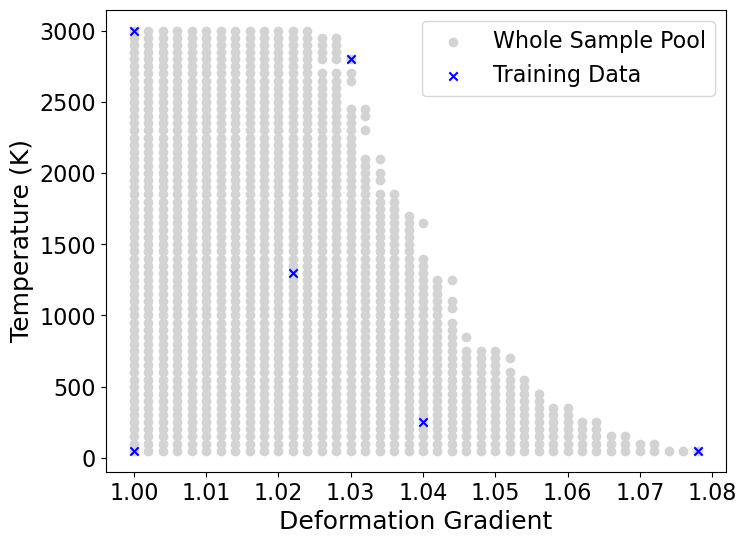

In [21]:
import matplotlib.pyplot as plt
#title_fontsize = 16
label_fontsize = 18
ticks_fontsize = 16
legend_fontsize = 16
fig = plt.figure(figsize=(8, 6))
x_2 = [point[0] for point in input_data_lab]
y_2 = [(point[1] * 1000 - 1000) * 30 for point in input_data_lab]
plt.scatter(x_2, y_2, marker='o', color='lightgray', label='Whole Sample Pool')  
# Assuming associated_data is the whole sample set and train_data_lab is the training data subset
# Extracting x and y coordinates for the whole sample set
x_1 = [point[0] for point in associated_data]
y_1 = [(point[1] * 1000 - 1000) * 30 for point in associated_data]
plt.scatter(x_1, y_1, marker='x', color='blue', label='Training Data')  
# Plotting the whole sample set with a specific marker and color

# Setting labels, title, and legend to distinguish between the datasets
plt.xlabel('Deformation Gradient',fontsize=label_fontsize)
plt.ylabel('Temperature (K)',fontsize=label_fontsize)
#plt.title('Scatter Plot with Predicted Colors')
plt.legend(fontsize=legend_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.savefig('2Deva2.png')
# Show the plot
plt.show()

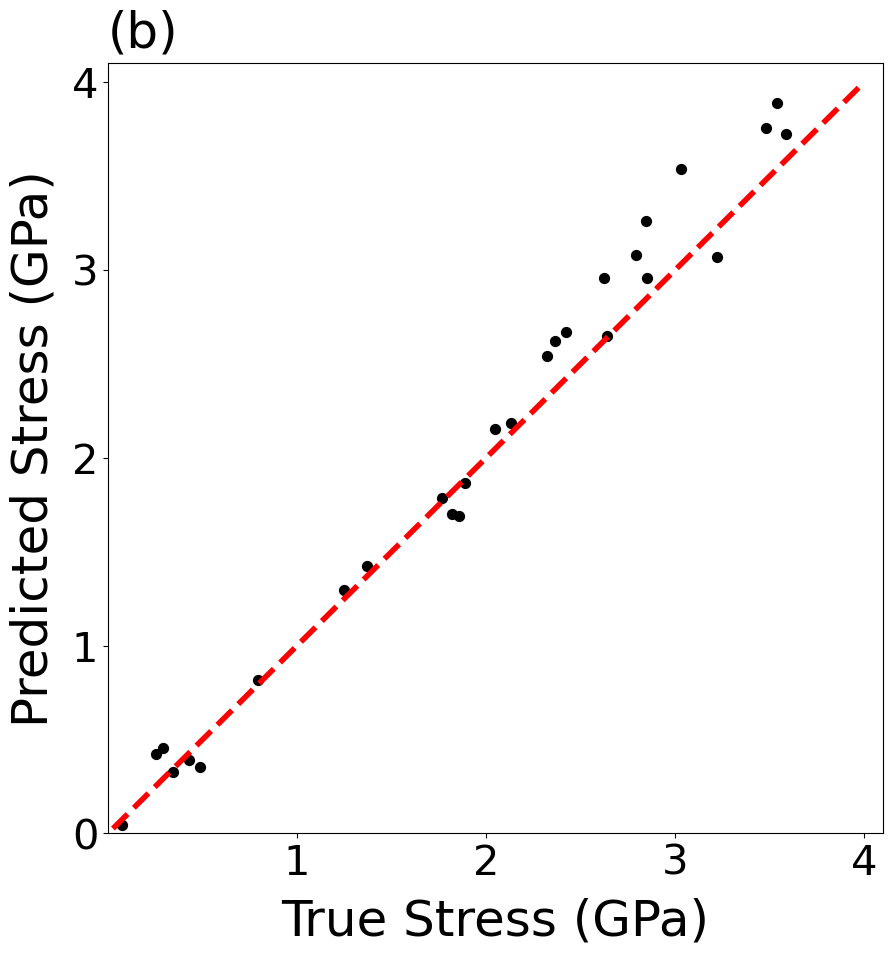

In [22]:
# Creating a 3D plot with connected points for true and predicted values
#title_fontsize = 20
label_fontsize = 36
ticks_fontsize = 30
legend_fontsize = 32
labelpad = 10

x_values = test_data_lab[:, 0]
y_values = (test_data_lab[:, 1] * 1000 - 1000) * 30
z_values = test_labels_lab
# Plotting true values
pre_test_data = model.predict(test_data_lab)
# Plotting predicted values

# Creating a 2D plot comparing true values vs. predicted values
fig, ax = plt.subplots(figsize=(10, 10))

# True values vs. Predicted values
ax.scatter(z_values, pre_test_data, c='black', label='Predictions', s=50)

# Plotting the diagonal line for reference (perfect predictions line)
ax.plot([z_values.min(), z_values.max()], [z_values.min(), z_values.max()], 'r--', lw=4, label='Perfect Predictions')

# Setting labels and title
ax.set_xlabel('True Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
ax.set_ylabel('Predicted Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
# ax.set_title('Comparison of True vs. Predicted Stress Values')

# Setting the ticks font size
ax.tick_params(axis='x', labelsize=ticks_fontsize)
ax.tick_params(axis='y', labelsize=ticks_fontsize)
min_val = 0
max_val = 4.1
ax.set_xlim([min_val, max_val])
ax.set_ylim([min_val, max_val])
ax.set_xticks([ 1, 2, 3, 4])
ax.set_yticks([0, 1, 2, 3, 4])
# Adding a legend
#ax.legend(loc='upper left', fontsize=legend_fontsize)

ax.text(-0.00, 1.07, '(b)', transform=ax.transAxes, fontsize=label_fontsize, verticalalignment='top')

plt.savefig('diagonal6.png')
plt.show()

## second prediction

In [23]:
# Make predictions
all_data_points=np.array(all_data_points)
scale_all_data_points=all_data_points / 1000
predictions = model.predict(scale_all_data_points)

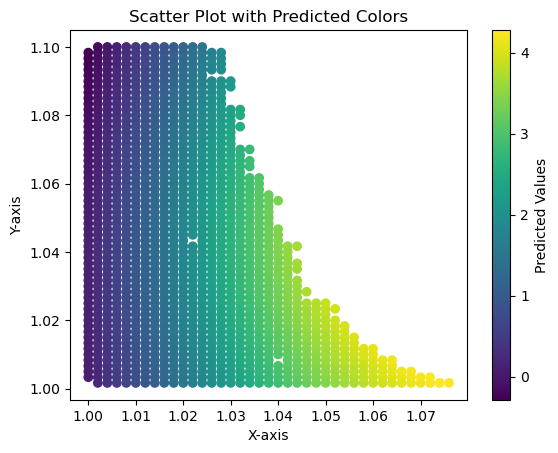

1290


In [24]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()
print(len(all_data_points))

## Loop

In [25]:
for main_loop in range (4):
    scale_all_data_points = [tuple(row) for row in scale_all_data_points]
    all_data_points = [tuple(row) for row in all_data_points]
    predictions = np.array(predictions)
    n_iter = [t[2] for t in associated_data]
    n_iter_input = [(point[0], point[1]) for point in associated_data]
    n_iter = np.array(n_iter)
    n_iter = n_iter.reshape(-1, 1)
    n_iter_select = []
    for u in range (0,num_itera):
        max_dis=0
        for i in range (0, len(predictions)):
            min_dis=float('inf')
            for j in range (0, len(n_iter)):
                dis_1=abs(predictions[i]-n_iter[j])
                dis_2=euclidean_distance(scale_all_data_points[i], n_iter_input[j])
                dis_3=dis_1*dis_2
                if dis_3 < min_dis:
                    min_dis = dis_3
            if min_dis > max_dis:
                max_dis = min_dis
                max_dis_point = all_data_points[i]
                index_remove = i
        predictions = np.delete(predictions, index_remove)
        n_iter_select.append(max_dis_point)
        all_data_points_set = set(all_data_points)  
        n_iter_select_set = set(n_iter_select)
        all_data_points_set.difference_update(n_iter_select_set)
        all_data_points = list(all_data_points_set)
        n_iter_select = list(n_iter_select_set)
        all_data_points=np.array(all_data_points)
        scale_all_data_points=all_data_points / 1000
        scale_all_data_points = [tuple(row) for row in scale_all_data_points]
        all_data_points = [tuple(row) for row in all_data_points]
   
    for point in n_iter_select:
        deformation, temperature = point
        key = (deformation, temperature)
        if key in farilure_lab:
            stress_v = farilure_lab[key]
            associated_data.append((deformation/1000, temperature/1000, stress_v))
            
    trainning_times = trainning_times+1
    trainning_num = trainning_num + num_itera
    trainning_nums.append(trainning_num)

    data = np.array(associated_data)
    input_data = data[:, :2]  
    output_data = data[:, 2]  
    train_data = input_data
    train_labels = output_data
    #train_data, test_data, train_labels, test_labels = train_test_split(input_data, output_data, test_size=0.2, random_state=1000)

    model = SVR(kernel='rbf', C=C_v, gamma=gamma_v)
    model.fit(train_data, train_labels)

    r2_predictions = model.predict(test_data_lab)
    R2 = r2_score(test_labels_lab, r2_predictions)
    mse_v = mean_squared_error(test_labels_lab, r2_predictions)
    R2_scores.append(R2)
    test_mse.append(mse_v)
    
    all_data_points=np.array(all_data_points)
    scale_all_data_points=all_data_points / 1000
    predictions = model.predict(scale_all_data_points)


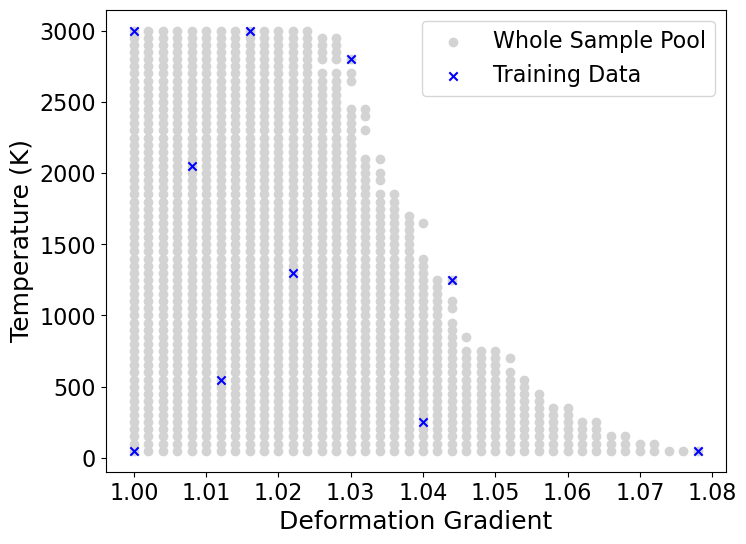

In [26]:
import matplotlib.pyplot as plt
#title_fontsize = 16
label_fontsize = 18
ticks_fontsize = 16
legend_fontsize = 16
fig = plt.figure(figsize=(8, 6))
x_2 = [point[0] for point in input_data_lab]
y_2 = [(point[1] * 1000 - 1000) * 30 for point in input_data_lab]
plt.scatter(x_2, y_2, marker='o', color='lightgray', label='Whole Sample Pool')  
# Assuming associated_data is the whole sample set and train_data_lab is the training data subset
# Extracting x and y coordinates for the whole sample set
x_1 = [point[0] for point in associated_data]
y_1 = [(point[1] * 1000 - 1000) * 30 for point in associated_data]
plt.scatter(x_1, y_1, marker='x', color='blue', label='Training Data')  
# Plotting the whole sample set with a specific marker and color

# Setting labels, title, and legend to distinguish between the datasets
plt.xlabel('Deformation Gradient',fontsize=label_fontsize)
plt.ylabel('Temperature (K)',fontsize=label_fontsize)
#plt.title('Scatter Plot with Predicted Colors')
plt.legend(fontsize=legend_fontsize)
plt.xticks(fontsize=ticks_fontsize)
plt.yticks(fontsize=ticks_fontsize)
plt.savefig('2Deva3.png')
# Show the plot
plt.show()

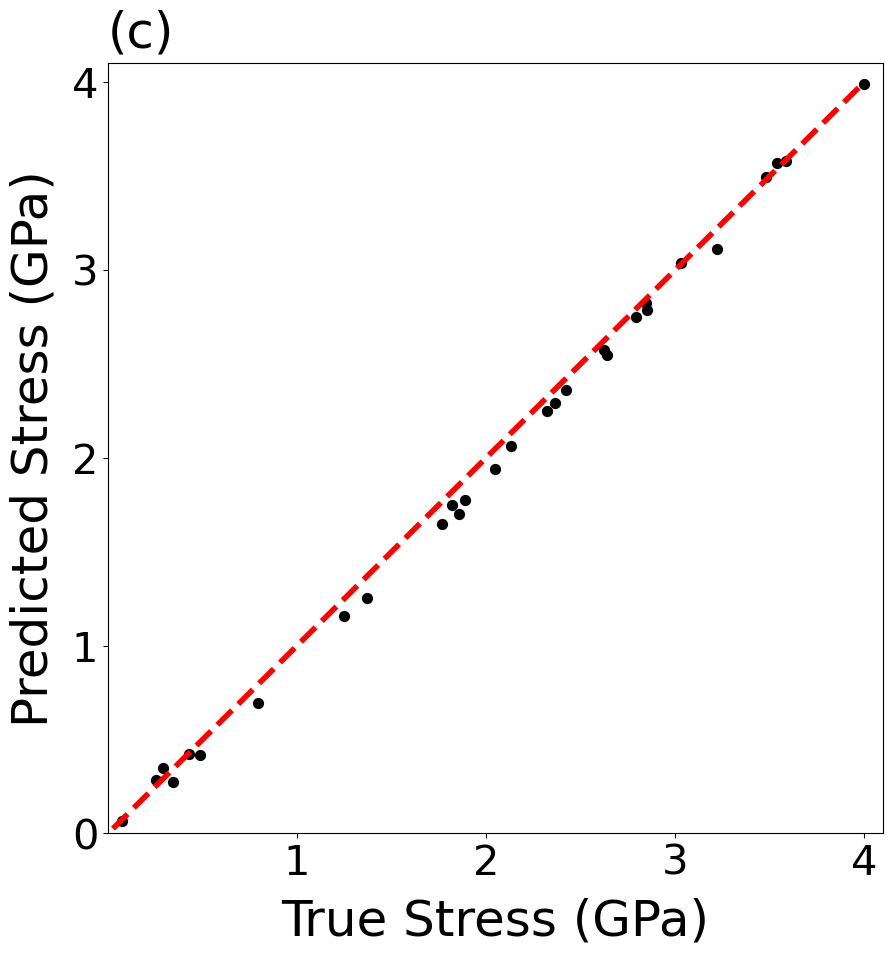

In [27]:
# Creating a 3D plot with connected points for true and predicted values
#title_fontsize = 20
label_fontsize = 36
ticks_fontsize = 30
legend_fontsize = 32
labelpad = 10

x_values = test_data_lab[:, 0]
y_values = (test_data_lab[:, 1] * 1000 - 1000) * 30
z_values = test_labels_lab
# Plotting true values
pre_test_data = model.predict(test_data_lab)
# Plotting predicted values

# Creating a 2D plot comparing true values vs. predicted values
fig, ax = plt.subplots(figsize=(10, 10))

# True values vs. Predicted values
ax.scatter(z_values, pre_test_data, c='black', label='Predictions', s=50)

# Plotting the diagonal line for reference (perfect predictions line)
ax.plot([z_values.min(), z_values.max()], [z_values.min(), z_values.max()], 'r--', lw=4, label='Perfect Predictions')

# Setting labels and title
ax.set_xlabel('True Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
ax.set_ylabel('Predicted Stress (GPa)', fontsize=label_fontsize, labelpad=labelpad)
# ax.set_title('Comparison of True vs. Predicted Stress Values')

# Setting the ticks font size
ax.tick_params(axis='x', labelsize=ticks_fontsize)
ax.tick_params(axis='y', labelsize=ticks_fontsize)
min_val = 0
max_val = 4.1
ax.set_xlim([min_val, max_val])
ax.set_ylim([min_val, max_val])
ax.set_xticks([ 1, 2, 3, 4])
ax.set_yticks([0, 1, 2, 3, 4])
# Adding a legend
#ax.legend(loc='upper left', fontsize=legend_fontsize)

ax.text(-0.00, 1.07, '(c)', transform=ax.transAxes, fontsize=label_fontsize, verticalalignment='top')

plt.savefig('diagonal10.png')
plt.show()

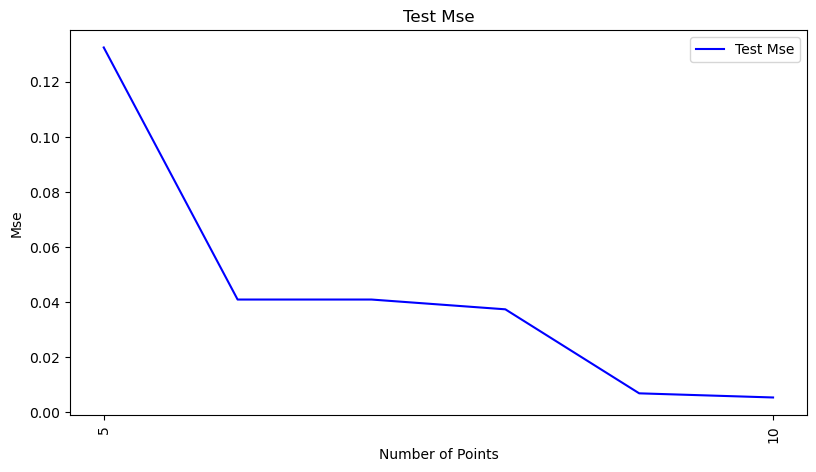

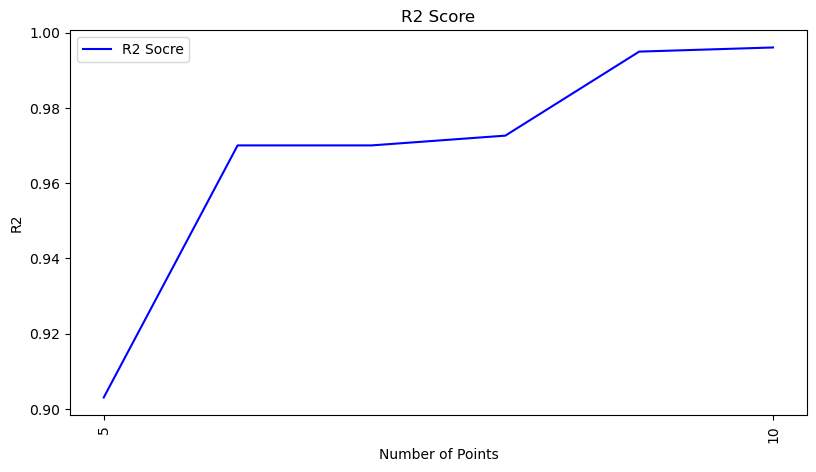

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 5))
plt.plot(trainning_nums, test_mse, c='b', label='Test Mse')
plt.title('Test Mse')
plt.xlabel('Number of Points')
plt.ylabel('Mse')
plt.legend()
plt.xticks(range(min(trainning_nums), max(trainning_nums)+1, 5), rotation=90)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 5))
plt.plot(trainning_nums, R2_scores, c='b', label='R2 Socre')
plt.title('R2 Score')
plt.xlabel('Number of Points')
plt.ylabel('R2')
plt.legend()
plt.xticks(range(min(trainning_nums), max(trainning_nums)+1, 5), rotation=90)
plt.show()

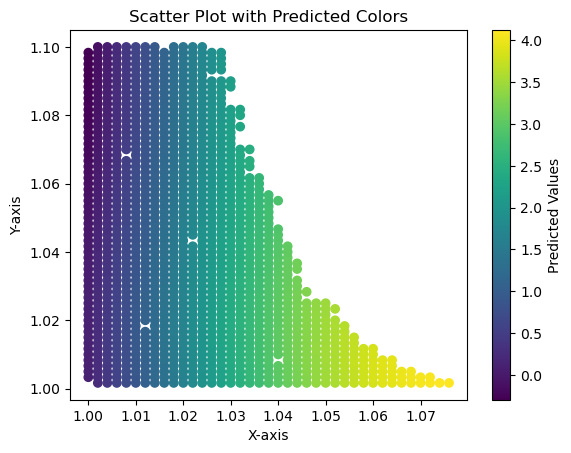

1286


In [29]:
import matplotlib.pyplot as plt
x = [point[0] for point in scale_all_data_points]
y = [point[1] for point in scale_all_data_points]

plt.scatter(x, y, c=predictions, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()
print(len(all_data_points))

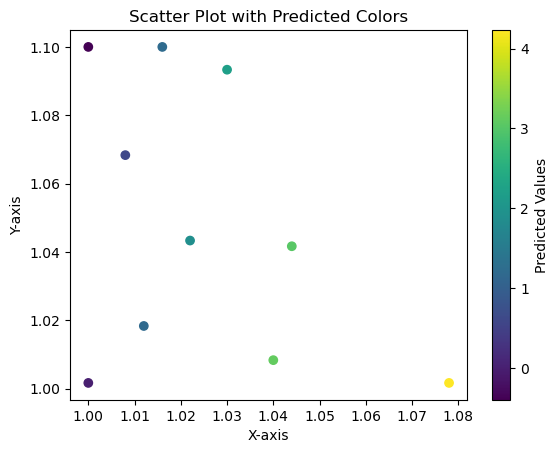

In [30]:
import matplotlib.pyplot as plt
x = [point[0] for point in associated_data]
y = [point[1] for point in associated_data]
z = [point[2] for point in associated_data]
plt.scatter(x, y, c=z, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

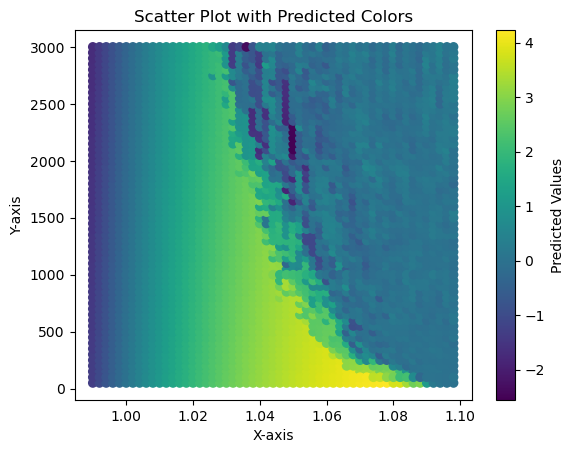

In [31]:
import matplotlib.pyplot as plt

x_value=[]
y_value=[]
color_v=[]
# Open and read the file
with open("failure_labeled.xyz", "r") as file:
    for line in file:
        data = line.strip().split()
        x_value.append(float(data[0]))
        y_value.append(float(data[1]))
        color_v.append(float(data[2]))  

plt.scatter(x_value, y_value, c=color_v, cmap='viridis')  # Use 'viridis' colormap or choose another colormap

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Predicted Colors')

# Add a color bar to indicate the color values
colorbar = plt.colorbar()
colorbar.set_label('Predicted Values')

# Show the plot
plt.show()

In [32]:
print(trainning_nums)
print(R2_scores)
print(test_mse)

[5, 6, 7, 8, 9, 10]
[0.9030204020178144, 0.9700122194411589, 0.9700122194411589, 0.9726108735704433, 0.9949413998711498, 0.996040471951143]
[0.13237831730000463, 0.040933681027120604, 0.040933681027120604, 0.0373864868951903, 0.006905049999008831, 0.005404803394897033]
